In [1]:
import pandas as pd
from sklearn.utils import resample

# Load the original dataset from the CSV file
data = pd.read_csv('/home/paritosh/workspace/TabularDeath/synthetic_easy.csv')

# Assuming 'target' is the column name for labels
X = data.drop('label', axis=1)
y = data['label']

# Determine the number of samples per class
samples_per_class = 1000 // 4  # Integer division to ensure equal number of samples per class

sampled_dfs = []

# Iterate over each unique class label
for label in y.unique():
    # Get the data points belonging to the current class
    class_data = data[y == label]
    
    # Sample the desired number of data points from the current class with replacement
    sampled_class_data = resample(class_data, n_samples=samples_per_class, replace=True, random_state=42)
    
    # Append the sampled data points to the sampled_data DataFrame
    sampled_dfs.append(sampled_class_data)

sampled_data = pd.concat(sampled_dfs, ignore_index=True)

# Separate the features (X) and labels (y) from the sampled data
sampled_X = sampled_data.drop('label', axis=1)
sampled_y = sampled_data['label']

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 4.686384
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.400818
[t-SNE] KL divergence after 1000 iterations: 1.156478


iVAT Processing: 100%|██████████| 999/999 [00:00<00:00, 87672.04it/s]


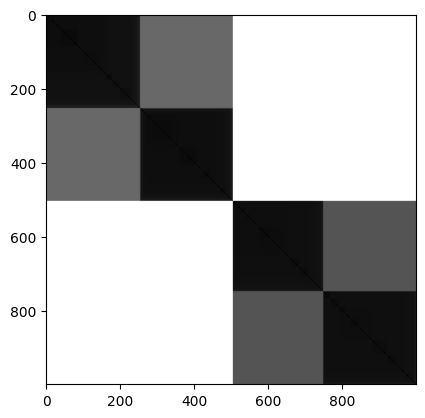

In [2]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
from VAT_library.iVAT import iVAT
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, verbose=1)
tsne_embeddings = tsne.fit_transform(sampled_X)

pairwise_dist = cdist(tsne_embeddings, tsne_embeddings)

RiV, RV, reordering_mat = iVAT(pairwise_dist)

plt.imshow(RiV, cmap='gray')
save_path = "/home/paritosh/workspace/IK_contrastive_dataset/synthetic_easy/synthetic_easy_raw_2D.png"
plt.savefig(save_path)